In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving Flowers-Dataset (1).zip to Flowers-Dataset (1).zip


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os 
import shutil
import random as rn 
from tqdm import tqdm 
import  tensorflow as tf 

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 


In [ ]:
base_dir="/content/drive/MyDrive/Flowers-Dataset (1)/flowers"

In [ ]:
print(os.listdir("/content/drive/MyDrive/Flowers-Dataset (1)/flowers"))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [ ]:
#some parameters for the loader 

batch_size=32
img_height=180
img_width=180

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
     base_dir,
     validation_split=0.2,
     subset="training",
     seed=123,
     image_size=(img_height,img_width),
     batch_size=batch_size)

Found 780 files belonging to 5 classes.
Using 624 files for training.


In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size)


Found 780 files belonging to 5 classes.
Using 156 files for validation.


In [ ]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


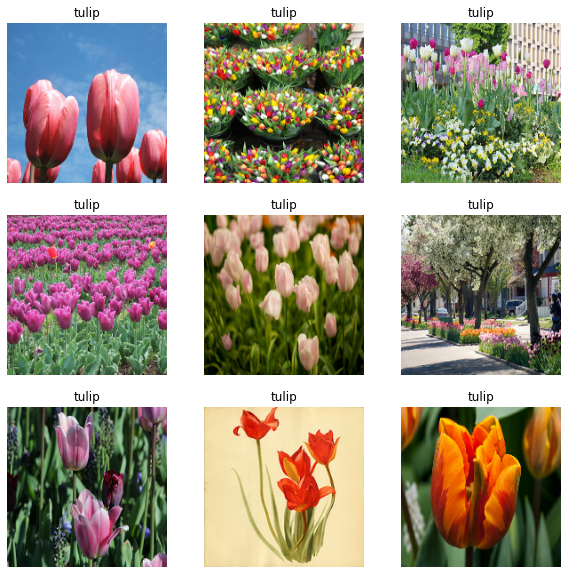

In [ ]:
#visualize the data
#training dataset

plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch,labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
from IPython.utils.text import num_ini_spaces
from IPython.core.debugger import coloransi
#create the model
img_height=180
img_height=180
color_channels=3

num_classes=5
model=Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,color_channels)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])


In [ ]:
#compile the model

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
             

In [ ]:
epochs=5
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/5
20/20 [==============================] - 65s 3s/step - loss: 0.0873 - accuracy: 0.9583 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
20/20 [==============================] - 26s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
20/20 [==============================] - 26s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
20/20 [==============================] - 26s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
20/20 [==============================] - 26s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


Text(0.5, 1.0, 'Training and Validation loss')

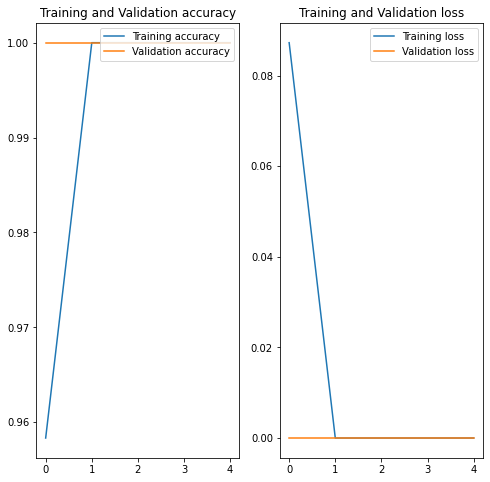

In [ ]:
#training
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training accuracy')
plt.plot(epochs_range,val_acc,label='Validation accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training loss')
plt.plot(epochs_range,val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')